In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

df=pd.read_csv('subscription_prediction.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10117,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
10118,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
10119,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
10120,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [2]:
df['y']=df['y'].apply(lambda x: 1 if x=="yes" else 0 )

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10117,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
10118,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
10119,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
10120,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [4]:
X=df.drop('y',axis=1)
y=df['y']

X.shape[0]

10122

In [5]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X, y, 
                                                  test_size=0.20, 
                                                  random_state = 417)

#Split into 2: TRAIN+VAL(80%) and TEST SET (20%)
print(X_train_val.shape[0])
print(X_val.shape[0])

8097
2025


In [6]:
#Split train and test
#Train is 0.8 test is 0.2
#Split train again into Train2 and Val:
#Train2 is 0.75 and Val is 0.25
#Train2 is 0.6 and val is 0.2
0.8*0.25

#In the end, Test is 0.2, Val is 0.2, Train is 0.6

X_train,X_test,y_train,y_test=train_test_split(X_train_val,y_train_val,
                        test_size=0.2*X.shape[0]/X_train_val.shape[0],
                        random_state=417)
print(X_train.shape[0])
print(X_test.shape[0])
print(X_val.shape[0])

6072
2025
2025


In [7]:
X.shape[0]/X_train.shape[0]

1.66699604743083

In [18]:
knn=KNeighborsClassifier(n_neighbors=3)
scaler=MinMaxScaler()
#Convert categorical variables to dummies
X_train=pd.get_dummies(data=X_train,columns=['marital','default'],drop_first=True)

In [19]:
#Fit and transform the nearly created dummy variables so that they are scaled.
X_trained_scaled=scaler.fit_transform(X_train[["marital_married","marital_single","marital_unknown","default_unknown","age","duration"]])

In [20]:
knn=KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_trained_scaled,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
X_val = pd.get_dummies(data = X_val, columns = ["marital", "default"], drop_first = True)

In [23]:
X_val_scaled=scaler.transform(X_val[["marital_married","marital_single","marital_unknown","default_unknown","age","duration"]])

In [24]:
val_accuracy=knn.score(X_val_scaled,y_val)
val_accuracy

0.6918518518518518

In [25]:
knn=KNeighborsClassifier(n_neighbors=2000)
knn.fit(X_trained_scaled,y_train)
val_accuracy=knn.score(X_val_scaled,y_val)
val_accuracy

0.5945679012345679

In [26]:
list=[]
n_list=[]
n=int(10)
for i in range(13):
    n_list.append(n)
    n=int(n*1.5)
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_trained_scaled,y_train)
    val_accuracy=knn.score(X_val_scaled,y_val)
    list.append(val_accuracy)
print(list)
print(n_list)
print("Best Model accuracy is: ",max(list))

[0.7708641975308642, 0.7644444444444445, 0.7679012345679013, 0.7674074074074074, 0.7644444444444445, 0.7604938271604939, 0.7540740740740741, 0.7446913580246913, 0.7209876543209877, 0.7140740740740741, 0.7328395061728395, 0.7249382716049383, 0.6237037037037036]
[10, 15, 22, 33, 49, 73, 109, 163, 244, 366, 549, 823, 1234]
Best Model accuracy is:  0.7708641975308642


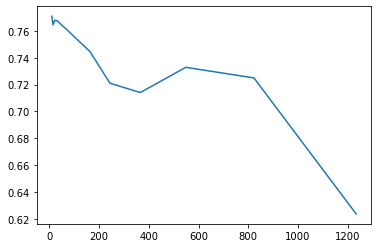

In [27]:
import matplotlib.pyplot as plt
plt.plot(n_list,list)

In [49]:
#Perform Gridsearch with Cross Validation manually
X_train,X_test,y_train,y_test=train_test_split(X,y)
neighbors=np.arange(1,15)
cross_val_scores=[]

#Convert categorical variables to dummies
X_train=pd.get_dummies(data=X_train,columns=['marital','default'],drop_first=True)

#Fit and transform the nearly created dummy variables so that they are scaled.
X_trained_scaled=scaler.fit_transform(X_train[["marital_married","marital_single","marital_unknown","default_unknown","age","duration"]])

for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,X_trained_scaled,y_train,cv=10)
    cross_val_scores.append(np.mean(scores))

print("Best cross validation score {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors=neighbors[np.argmax(cross_val_scores)]
print("Best n_neighbors: {}".format(best_n_neighbors))

#Convert categorical variables to dummies
X_test=pd.get_dummies(data=X_test,columns=['marital','default'],drop_first=True)

#Fit and transform the nearly created dummy variables so that they are scaled.
X_test_scaled=scaler.fit_transform(X_test[["marital_married","marital_single","marital_unknown","default_unknown","age","duration"]])

knn2=KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn2=knn2.fit(X_trained_scaled,y_train)
print('Best-set score: {:.3f}'.format(knn2.score(X_test_scaled,y_test)))

Best cross validation score 0.763
Best n_neighbors: 13
Best-set score: 0.762


In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

#Import the CSV File
df=pd.read_csv('subscription_prediction.csv')

#Replace all Target Columns to Binary 1 and 0
df['y']=df['y'].apply(lambda x: 1 if x=="yes" else 0 )

#Drop Target Column and Assign rest to X
X=df.drop('y',axis=1)
#Assign only Target Column to Y
y=df['y']

#Split Train Test Split into 80% and 20%.
X_train_val, X_val, y_train_val, y_val = train_test_split(X, y, 
                                                  test_size=0.20, 
                                                  random_state = 417)

#Check the shape of it.
X.shape[0]

#Perform GridSearchCV using libraries
X_train,X_test,y_train,y_test=train_test_split(X,y)

#Convert categorical variables to dummies for Training Set
X_train=pd.get_dummies(data=X_train,columns=['marital','default'],drop_first=True)

#Fit and transform the nearly created dummy variables so that they are scaled.
X_trained_scaled=scaler.fit_transform(X_train[["marital_married","marital_single","marital_unknown","default_unknown","age","duration"]])


#Convert categorical variables to dummies for Testing Set
X_test=pd.get_dummies(data=X_test,columns=['marital','default'],drop_first=True)

#Fit and transform the nearly created dummy variables so that they are scaled.
X_test_scaled=scaler.fit_transform(X_test[["marital_married","marital_single","marital_unknown","default_unknown","age","duration"]])

#Param GridSearchCV using respective libraries
param_grid={'n_neighbors':np.arange(1,15,2)}
grid=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=10,
                 return_train_score=True)

grid.fit=(X_train,y_train)
print("Best cross validation score {:.3f}".format(grid.best_score_))
print("Best n_neighbors: {}".format(grid.best_params_))

print("Best Set-Score: {:3f}".format(grid.score(X_test,y_test)))

NameError: name 'scaler' is not defined